In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame as show 
import seaborn as sns 
import squarify 
%matplotlib inline 

In [2]:
df=pd.read_csv('startup_funding.csv',dtype={
    
    'InvestmentType':'category'
    
})



In [3]:
df.head(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN


In [4]:
df.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [5]:
print("Information of total number of non-empty columns")
print("-------------------------------------------------")
print(df.info(null_counts=True))

Information of total number of non-empty columns
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null category
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: category(1), int64(1), object(8)
memory usage: 169.5+ KB
None


In [6]:
print('Rows {rows} in total and Columns {columns} in total'.format(rows=df.shape[0],columns=df.shape[1]))

Rows 2372 in total and Columns 10 in total


In [7]:
print("Columns and their datatypes")
df.dtypes 

Columns and their datatypes


SNo                    int64
Date                  object
StartupName           object
IndustryVertical      object
SubVertical           object
CityLocation          object
InvestorsName         object
InvestmentType      category
AmountInUSD           object
Remarks               object
dtype: object

In [8]:
print("Frequency count of missing values")
df.apply(lambda X:sum(X.isnull())) 


Frequency count of missing values


SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

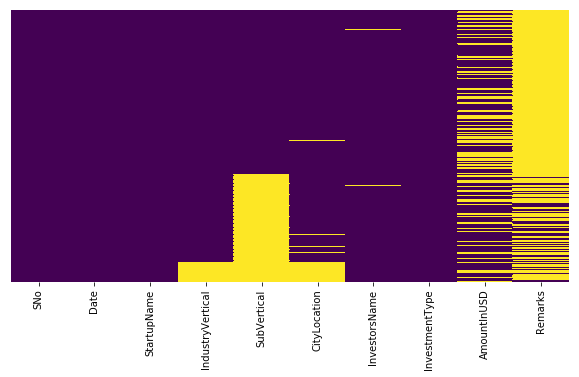

In [9]:

plt.figure(figsize=(10,5)) 
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()


In [10]:
print("Here we can see in date column error- '.' is there instead of '/'")
df[df['Date']=='12/05.2015']['Date']


Here we can see in date column error- '.' is there instead of '/'


2103    12/05.2015
2104    12/05.2015
Name: Date, dtype: object

In [11]:
df['AmountInUSD'].head(5)

0    1,300,000
1          NaN
2          NaN
3      500,000
4      850,000
Name: AmountInUSD, dtype: object

In [12]:
df['CityLocation']=df['CityLocation'].fillna(value='NotSpecific')

In [13]:
df['IndustryVertical']=df['IndustryVertical'].fillna(value='Other')

In [14]:
import re
def convert_Slash(x):
    x=x.lower()
    if   re.search('/',x):
        return x.split('/')[0].strip() 
    else :
        return x.strip()
df['CityLocation']=df['CityLocation'].apply(convert_Slash)

In [15]:
newdf=df.copy()
del newdf['Remarks']
del newdf['SNo']

In [16]:
print('Different categories of Inverstment Type before cleansing and removing duplicacy in categories are as follows- ')
newdf['InvestmentType'].value_counts().index


Different categories of Inverstment Type before cleansing and removing duplicacy in categories are as follows- 


CategoricalIndex(['Seed Funding', 'Private Equity', 'SeedFunding',
                  'PrivateEquity', 'Debt Funding', 'Crowd funding',
                  'Crowd Funding'],
                 categories=['Crowd Funding', 'Crowd funding', 'Debt Funding', 'Private Equity', 'PrivateEquity', 'Seed Funding', 'SeedFunding'], ordered=False, dtype='category')

In [17]:
print('Different categories of Inverstment Type after cleansing and removing duplicacy in categories are as follows- ')
newdf['InvestmentType']=newdf['InvestmentType'].apply(lambda x:x.replace(' ','').lower())#code to apply mapping to remove duplicate categories
newdf['InvestmentType'].value_counts().index

Different categories of Inverstment Type after cleansing and removing duplicacy in categories are as follows- 


Index(['seedfunding', 'privateequity', 'crowdfunding', 'debtfunding'], dtype='object')

In [18]:
def rem_err_date(x):
    if re.search('.',x):
        return x.replace('.','')
    return x

newdf['Date']=newdf['Date'].apply(rem_err_date)
newdf['Date'].replace('12/052015','12/05/2015',inplace=True)
newdf['Date'].replace('15/012015','15/01/2015',inplace=True)
newdf['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdf['Date'].replace('13/042015','13/04/2015',inplace=True)
newdf['Date']=pd.to_datetime(newdf['Date'],format='%d/%m/%Y')

In [19]:
print('processed datatype of Date column')
newdf.dtypes['Date']

processed datatype of Date column


dtype('<M8[ns]')

In [20]:
def calculate_n_investors(x):
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdf['numberofinvestors']=newdf['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)

In [21]:
n_inv2=newdf

n_inv=newdf['InvestorsName']
n_inv.fillna(value='None',inplace=True)
listed_n_inv=n_inv.apply(lambda x: x.lower().strip().split(','))
investors=[]
for i in listed_n_inv:
    for j in i:
        if(i!='None' or i!=''):
            investors.append(j.strip())
unique_investors=list(set(investors))


In [22]:
investors=pd.Series(investors)
unique_investors=pd.Series(unique_investors)

In [23]:
investors=list(investors[investors!=''])
unique_investors=list(unique_investors[unique_investors!=''])


In [24]:
for i in range(len(unique_investors)):
    for j in range(len(investors)):
        if(re.search(unique_investors[i],investors[j])):
            investors[j]=unique_investors[i]


In [25]:
def convert_AmountInUSD(x):
    if re.search(',',x):
        return (x.replace(',',''))
    return x
newdf['AmountInUSD']=newdf[newdf['AmountInUSD'].notnull()]['AmountInUSD'].apply(convert_AmountInUSD).astype('int')

In [26]:
newdf['AmountInUSD']=round(newdf['AmountInUSD'].fillna(np.mean(newdf['AmountInUSD'])))
newdf['AmountInUSD']=newdf['AmountInUSD'].astype('int')

In [27]:
newdf['InvestmentType'].fillna(method='bfill',inplace=True)

In [28]:
newdf.iloc[:,[1,2,3,4,6]]=newdf.iloc[:,[1,2,3,4,6]].applymap(lambda x: x.lower().replace(' ','') if pd.notnull(x) is True else x )

In [29]:

def check(x):
    if(pd.notnull(x)):
        return x.lower()
newdf.iloc[:,3]=newdf.iloc[:,3].apply(check)  


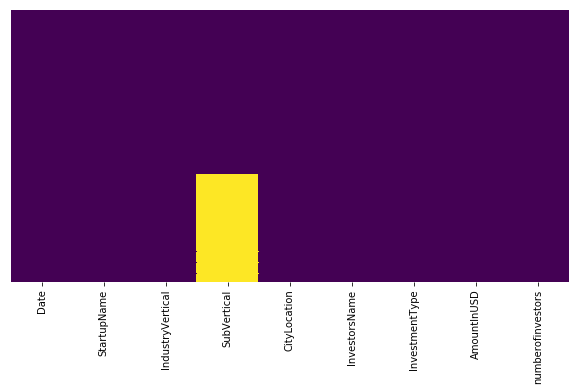

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(newdf.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

In [31]:
unique_startup_name=list(newdf['StartupName'].unique())
startupname=list(newdf['StartupName'])

In [32]:
for i in range(len(unique_startup_name)):
    for j in range(len(startupname)):
        if(re.search(unique_startup_name[i],startupname[j])):
            startupname[j]=unique_startup_name[i]


In [33]:
newdf['StartupName']=startupname

In [34]:
newdf.head(10)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,2017-08-01,touchkin,technology,predictivecareplatform,bangalore,Kae Capital,privateequity,1300000,1
1,2017-08-02,ethinos,technology,digitalmarketingagency,mumbai,Triton Investment Advisors,privateequity,12031073,1
2,2017-08-02,leverageedu,consumerinternet,onlineplatformforhighereducationservices,newdelhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
3,2017-08-02,zepo,consumerinternet,diyecommerceplatform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
4,2017-08-02,click2clinic,consumerinternet,healthcareserviceaggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2
5,2017-07-01,billionloans,consumerinternet,peertopeerlendingplatform,bangalore,Reliance Corporate Advisory Services Ltd,seedfunding,1000000,1
6,2017-07-03,ecolibriumenergy,technology,energymanagementsolutionsprovider,ahmedabad,"Infuse Ventures, JLL",privateequity,2600000,2
7,2017-07-04,droom,ecommerce,onlinemarketplaceforautomobiles,gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",privateequity,20000000,2
8,2017-07-05,jumbotail,ecommerce,onlinemarketplaceforfoodandgrocery,bangalore,"Kalaari Capital, Nexus India Capital Advisors",privateequity,8500000,2
9,2017-07-05,moglix,ecommerce,b2bmarketplaceforindustrialproducts,noida,"International Finance Corporation, Rocketship,...",privateequity,12000000,6


In [35]:
newdf.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,2017-08-01,touchkin,technology,predictivecareplatform,bangalore,Kae Capital,privateequity,1300000,1
1,2017-08-02,ethinos,technology,digitalmarketingagency,mumbai,Triton Investment Advisors,privateequity,12031073,1
2,2017-08-02,leverageedu,consumerinternet,onlineplatformforhighereducationservices,newdelhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
3,2017-08-02,zepo,consumerinternet,diyecommerceplatform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
4,2017-08-02,click2clinic,consumerinternet,healthcareserviceaggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2


In [36]:
show(newdf.describe()['AmountInUSD'].astype(int))



,AmountInUSD
count,2372
mean,12031073
std,51335545
min,16000
25%,700000
50%,7300000
75%,12031073
max,1400000000


In [37]:
print(newdf['StartupName'].nunique())


1792


In [38]:
tp10fund=show(newdf.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False))
tp10fund.head(10)



,AmountInUSD
StartupName,
paytm,2.364062e+09
flipkart,2.259700e+09
ola,2.001391e+09
snapdeal,7.000000e+08
oyo,6.610621e+08
quikr,2.300000e+08
delhivery,2.150000e+08
cartrade,2.120311e+08
foodpanda,2.100000e+08


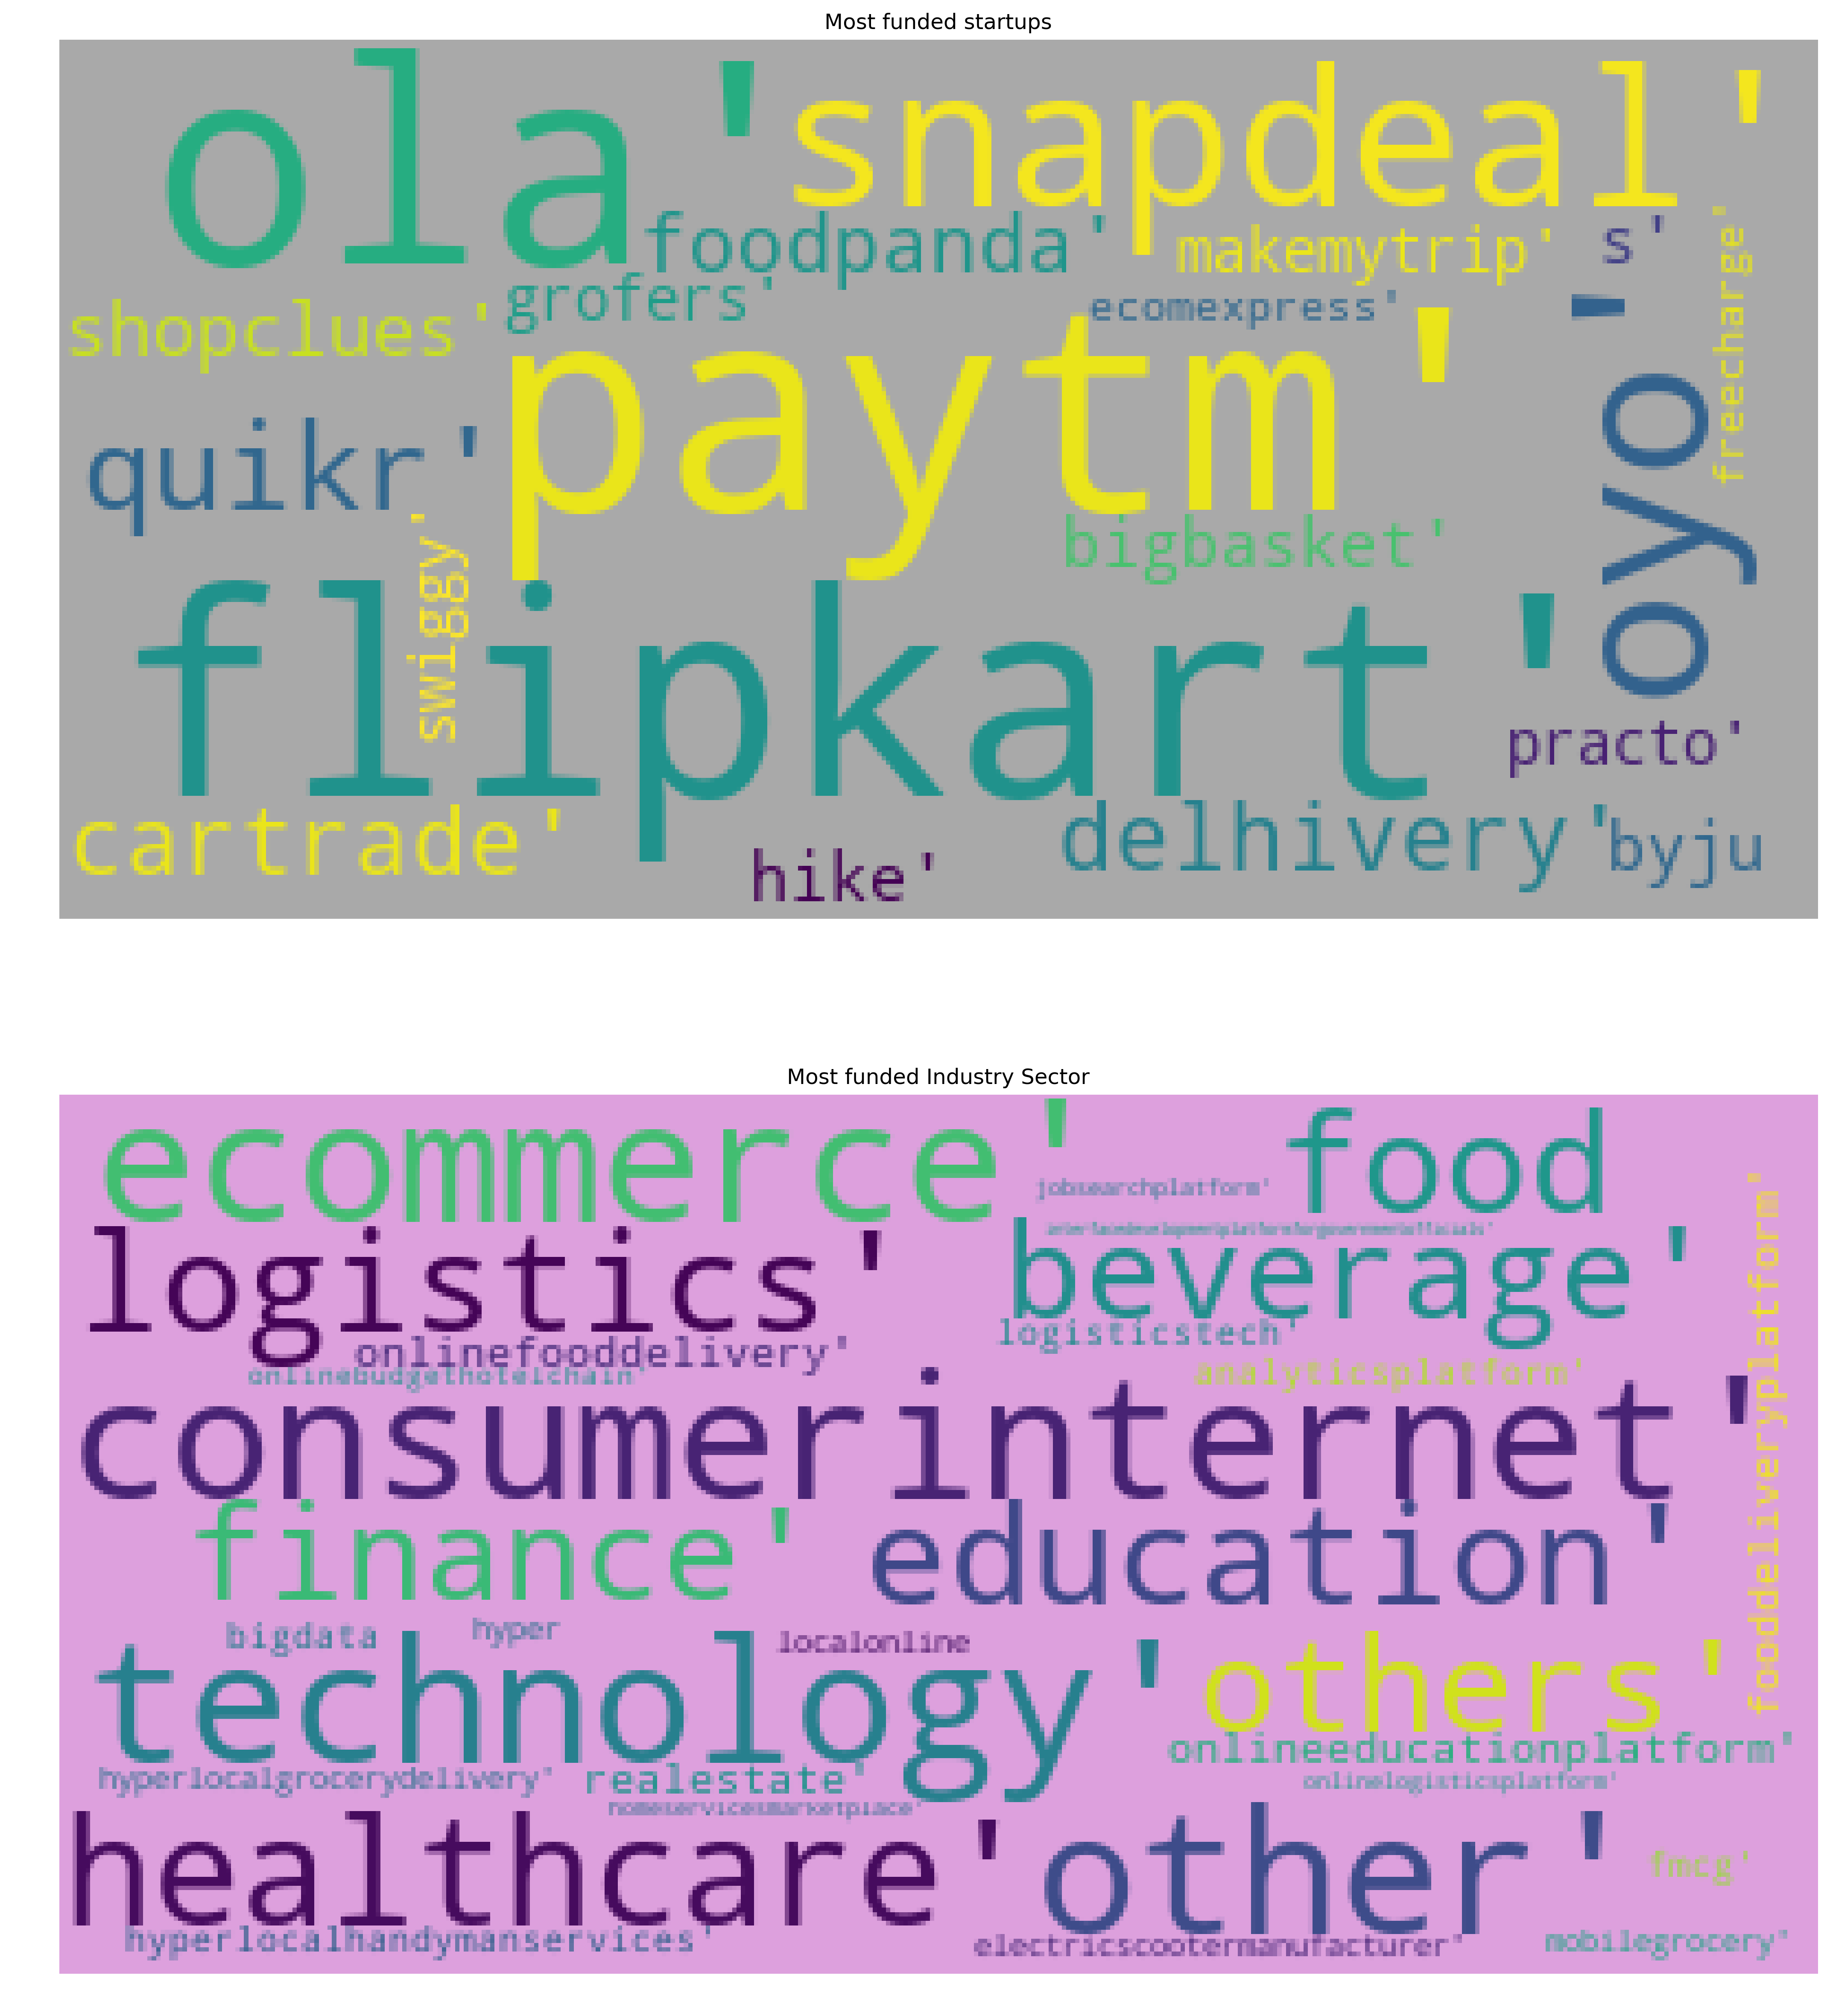

In [39]:
from wordcloud import WordCloud, STOPWORDS


st=pd.Series(newdf.groupby('StartupName').sum()['AmountInUSD'].sort_values(ascending=False).head(40).index).head(30)
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,20),dpi=300)

for char in range(len(st)):
    st[char]=st[char].replace(' ','_')

wc=WordCloud(max_words=20,stopwords=set(st),background_color='darkgrey',random_state=0).generate(str(st.values[:30]))
ax[0].axis('off')
ax[0].set_title('Most funded startups')
ax[0].imshow(wc)




c=np.array(newdf['IndustryVertical'].value_counts().head(30).index.unique())
for char in range(len(c)):
    c[char]=c[char].replace(' ','_')

               
wc=WordCloud(max_words=30,stopwords=set(c),background_color='plum',random_state=1).generate(str(c))

ax[1].axis('off')
ax[1].set_title('Most funded Industry Sector')

ax[1].imshow(wc)
plt.rcParams['axes.facecolor'] = 'white'





In [40]:

def find(x):
    if x in tp10fund.head(10).index:
        return True
    return False

n=newdf[newdf['StartupName'].apply(find)]
print('amount funded on top 10 startups')
n.describe().iloc[:,0]

amount funded on top 10 startups


count    5.800000e+01
mean     1.562232e+08
std      2.859792e+08
min      1.470000e+05
25%      1.203107e+07
50%      5.750000e+07
75%      1.362500e+08
max      1.400000e+09
Name: AmountInUSD, dtype: float64

In [41]:
pd.crosstab(n['StartupName'],columns=n['InvestmentType']).sort_values(by='privateequity',ascending=False)

InvestmentType,privateequity,seedfunding
StartupName,,
ola,16,7
oyo,6,2
paytm,6,0
flipkart,5,0
cartrade,3,0
delhivery,3,0
quikr,3,0
shopclues,3,0
foodpanda,2,0


In [42]:
newdf[newdf['StartupName']=='paytm']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
158,2017-05-18,paytm,ecommerce,mobilewallet&ecommerceplatform,bangalore,SoftBank Group,privateequity,1400000000,1
266,2017-03-03,paytm,ecommerce,ecommercemarketplace,bangalore,Alibaba,privateequity,200000000,1
821,2016-08-30,paytm,ecommerce,mobilewallet&ecommerceplatform,bangalore,MediaTek Inc.,privateequity,60000000,1
1787,2015-09-29,paytm,e-commerce&m-commerceplatform,None,newdelhi,"Alibaba Group, Ant Financial",privateequity,680000000,2
2218,2015-03-13,paytm,other,None,notspecific,Ratan Tata,privateequity,12031073,1
2276,2015-02-05,paytm,other,None,notspecific,Ant Financial Services (Alipay),privateequity,12031073,1


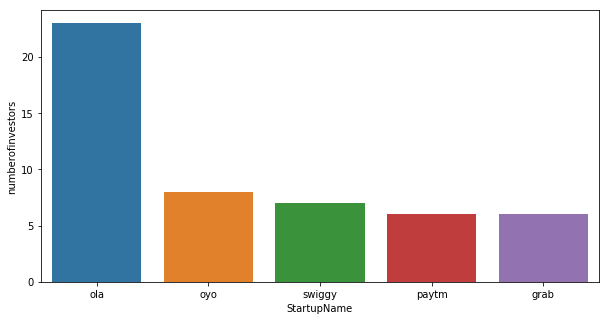

,numberofinvestors
StartupName,
ola,23
oyo,8
swiggy,7
paytm,6
grab,6
urbanclap,6
medinfi,5
stalkbuylove,5
lenskart,5


In [43]:

cmi=show(newdf.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending=False))
fig=plt.figure(figsize=(10,5))
sns.barplot(y='numberofinvestors',x='StartupName',data=cmi.reset_index().head())
plt.show()
cmi.head(10)

C:\Users\Pavan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


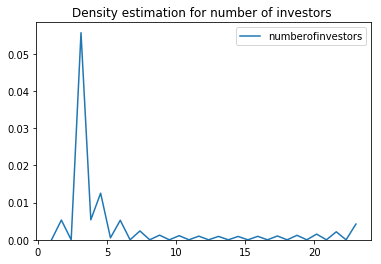

In [44]:
sns.kdeplot(data=cmi.reset_index()['numberofinvestors'],gridsize=20,)#most are  2 or 3 in number
plt.title('Density estimation for number of investors ')
plt.show()

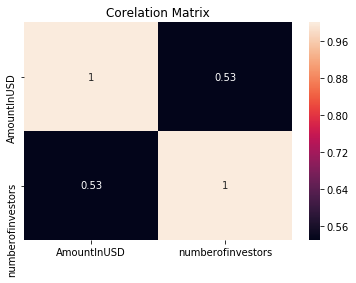

In [45]:
top10=tp10fund.join(cmi)
sns.heatmap(top10.corr(),annot=True)
plt.title('Corelation Matrix')
plt.show()
